## define encounter matrix

In [63]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((100, 100))

# Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


In [26]:
def utility_func(g1,g2,m1,m2,alpha1,alpha2,eta1,eta2):
  a=m1**(eta1-1)
  b=m2**(eta2-1)
  c=g1**(alpha1-1)
  d=g2**(alpha2-1)
  utility=a*b*c*d
  utility=float(utility)
  return utility

In [56]:
import numpy as np

# Create a 1000x1000 matrix filled with 1s
matrix3 = np.ones((100, 100))

# Set the diagonal elements to 0
np.fill_diagonal(matrix3, 0)

## trade

In [4]:


def random_pick(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=round(G*a)
    new_g = random.randint(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0.5:
        new_g = 1 + (1 - new_g)
    elif new_g > G-0.5:
        new_g = 2*(G-1) - new_g

    return new_g




In [5]:
def random_pick2(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=G*a
    new_g = random.uniform(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0:
        new_g = - new_g
    elif new_g > G:
        new_g = 2*G - new_g

    return new_g

## trade func

In [6]:
import random
import math

def trade(good1,good2,money1,money2,alpha1,alpha2,eta1,eta2):


    i=0
    M=money1+money2
    G=good1+good2

    while i <100:

        # Generate a random reallocation
        new_good  = random_pick2(good1,G,0.3)
        new_money = random_pick2(money1,M,0.3)



        # Calculate the change in utility
        money_utility1 = utility_func(good1,good2,money1,money2, alpha1,alpha2, eta1,eta2)

        money_utility2 =utility_func(new_good,(G-new_good), new_money,(M-new_money),alpha1,alpha2, eta1,eta2)


        if money_utility2 > money_utility1:
            # Accept the reallocation




            money1 = money1+0.01*(new_money-money1)



            good1=good1+0.01*(new_good-good1)

            money2 = M-money1



            good2=G-good1



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


              money1 = money1+0.1*(new_money-money1)



              good1=good1+0.1*(new_good-good1)

              money2 = M-money1



              good2=G-good1



        i=i+1




    return good1,good2,money1,money2






In [7]:
def trade_p(good1,money1,alpha_1,eta_1,miu,size):


    i=0
    G=good1+(money1/miu)


    while i <100:

        # Generate a random reallocation
        new_good  = random_pick2(good1,G,0.3)
        new_money =money1- miu*(new_good-good1)



        # Calculate the change in utility
        money_utility1 = utility_func(good1,1,money1,1, alpha_1,1, eta_1,1)

        money_utility2 =utility_func(new_good,1,new_money,1, alpha_1,1, eta_1,1)


        if money_utility2 > money_utility1:
          money1 = money1+size*(new_money-money1)



          good1=good1+size*(new_good-good1)



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:
              money1 = money1+size*(new_money-money1)



              good1=good1+size*(new_good-good1)




        i=i+1




    return good1,money1



## trade money

In [8]:
def trade_m(good1,good2,money1,money2,alpha1,alpha2,eta1,eta2,size,size2):


    i=0
    M=money1+money2


    while i <100:

        # Generate a random reallocation
        new_money = random_pick2(money1,M,0.1)



        # Calculate the change in utility
        money_utility1 = utility_func(good1,good2,money1,money2, alpha1,alpha2, eta1,eta2)

        money_utility2 =utility_func(good1,good2,new_money,(M-new_money), alpha1,alpha2, eta1,eta2)


        if money_utility2 > money_utility1:
            # Accept the reallocation


            money1 = money1+size2*size*(new_money-money1)

            money2 = money2-size*(new_money-money1)



        else:
            # Decide with a probability whether to accept the reallocation
            probability = (money_utility2/money_utility1)
            if random.random() < probability:


                money1 = money1+size2*size*(new_money-money1)

                money2 = money2-size*(new_money-money1)





        i=i+1




    return money1,money2

## different encounter rate

In [9]:
import random

def encounter1(matrix):
    # Pick a random row
    row = random.choice(range(len(matrix)))

    # Pick a random column different from the row
    possible_cols = [i for i in range(len(matrix[0])) if i != row]
    col = random.choice(possible_cols)

    return row, col





# same random encounter rate


In [10]:
matrix2= np.ones((20, 20))

## inter trade

In [11]:
def agent_inter_trade(lg1,lg2,lm1,lm2,matrix_i,alpha_1,alpha_2,eta_1,eta_2):
  a1,a2=encounter1(matrix_i)
  money1=lm1[a1]
  money2=lm2[a2]
  good1=lg1[a1]
  good2=lg2[a2]

  g1n,g2n,m1n,m2n=trade(good1,good2,money1,money2,alpha_1,alpha_2,eta_1,eta_2)
  lg1[a1]=g1n
  lg1[a2]=g2n
  lm1[a1]=m1n
  lm2[a2]=m2n
  return lg1,lg2,lm1,lm2

#3 else

In [12]:
from numpy.core.shape_base import atleast_2d
def agent_intra_trade(list1,list2,matrix_i,alpha1,eta1):
  a1,a2=encounter1(matrix_i)
  money1=list2[a1]
  money2=list2[a2]
  good1=list1[a1]
  good2=list1[a2]

  g1n,g2n,m1n,m2n=trade(good1,good2,money1,money2,alpha1,alpha1,eta1,eta1)
  list2[a1]=m1n
  list2[a2]=m2n
  list1[a1]=g1n
  list1[a2]=g2n
  return list1,list2

In [13]:
def agent_inter_mtrade(lg1,lg2,lm1,lm2,matrix_i,alpha_1,alpha_2,eta_1,eta_2,size,size2):
  a1,a2=encounter1(matrix_i)
  money1=lm1[a1]
  money2=lm2[a2]
  good1=lg1[a1]
  good2=lg2[a2]

  m1n,m2n=trade_m(good1,good2,money1,money2,alpha_1,alpha_2,eta_1,eta_2,size,size2)
  tm1=lm1.copy()
  tm2=lm2.copy()
  tm1[a1]=m1n
  tm2[a2]=m2n
  return tm1,tm2

In [98]:
def agent_inter_tradep(list1,list2,matrix_i,alpha_1,eta_1,miu,size):
  a1=random.randint(0, 99)
  ls1=list1.copy()
  ls2=list2.copy()
  money1=ls2[a1]
  good1=ls1[a1]


  g1n,m1n=trade_p(good1,money1,alpha_1,eta_1,miu,size)


  ls2[a1]=m1n
  ls1[a1]=g1n

  return ls1,ls2

In [15]:
def check_state(list1, list2,t0, t1s,t2s,t1,t2, state,t11,t22):
    sum_g = sum(list1)
    sum_m = sum(list2)
    T = (sum_m)/200
    print('Key',t1s,T,abs(t1s-T))

    new_state = state

    if state == 1:
        if  abs(T-t1s)>0.2 :
            new_state = 1
        else:
            new_state = 2
    elif state == 2:
        if  t1s-t1>t11 :
            new_state = 3
        else:
          new_state=2
    elif state == 3:
        if abs(T- t2s)<0.2:
            new_state = 4
        else:
          new_state=3

    elif state == 4:
        if  t2-t2s>t22:
            new_state = 1
        else:
          new_state=4

    return new_state


In [16]:
def check_state2(list1, list2, t1s,t2s,state,g11, g22):
    sum_g = sum(list1)
    sum_m = sum(list2)
    T = (sum_m)/200
    print('Key',t1s,T,abs(t1s-T))

    new_state = state

    if state == 1:
        if  abs(T-t1s)>0.5 :
            new_state = 1
        else:
            new_state = 2
    elif state == 2:
        if  sum_g>g11 :
            new_state = 3
        else:
          new_state=2
    elif state == 3:
        if abs(T- t2s)<0.5:
            new_state = 4
        else:
          new_state=3

    elif state == 4:
        if  sum_g<g22 :
            new_state = 1
        else:
          new_state=4

    return new_state

## Split State Function


In [17]:
def split_state(Gk8,Mk8,S8):
  G1=Gk8

  T1 = [Mk8[i] /200 for i in range(len(G1))]




  entropy = [200 * (math.log(G1[i])+math.log(T1[i])) for i in range(len(G1))]
  price = [T1[i] / G1[i] for i in range(len(G1))]
  if 2 in S8:
      first_position = S8.index(2)
      print(f"The first occurrence of 2 is at index {first_position}")
  else:
      print("2 is not in the list")
  # Initialize empty lists for each state
  G1_1, G1_2, G1_3, G1_4,G1_5 = [], [], [], [],[]
  T1_1, T1_2, T1_3, T1_4,T1_5 = [], [], [], [],[]
  E1,E2,E3,E4,E5=[],[],[],[],[]
  P1,P2,P3,P4,P5=[],[],[],[],[]
  # Divide items based on states
  for i, state in enumerate(S8):
      if state == 1 and i <first_position:
          G1_1.append(G1[i])
          T1_1.append(T1[i])
          E1.append(entropy[i])
          P1.append(price[i])
      elif state == 2:
          G1_2.append(G1[i])
          T1_2.append(T1[i])
          E2.append(entropy[i])
          P2.append(price[i])
      elif state == 3:
          G1_3.append(G1[i])
          T1_3.append(T1[i])
          E3.append(entropy[i])
          P3.append(price[i])
      elif state == 4:
          G1_4.append(G1[i])
          T1_4.append(T1[i])
          E4.append(entropy[i])
          P4.append(price[i])
      elif state==1 and i >first_position:
          G1_5.append(G1[i])
          T1_5.append(T1[i])
          E5.append(entropy[i])
          P5.append(price[i])



  # sorted_data = sorted(zip(G1_1, T1_1,E1,P1), key=lambda x: x[0])
  # G1_1_sorted, T1_1_sorted,E1_sorted,P1_sorted = zip(*sorted_data)
  # Plot T on G with different colors using plt.plot



  #m41.append(T1_5[0])



  #g41.append(G1_5[0])
  return G1_1, T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4

In [99]:
from os import statvfs_result
def inter_trade(gooda,goodb,goodc,moneya,moneyb,moneyc,t1s,t2s,g11,g22,type):

  alphaa=2
  alphab=2
  alphac=2
  etaa=2
  etab=2
  etac=2
  num_agent=100

  state=1
  Gl=[]
  Ml=[]
  count=0
  S=[]
  gapb=0
  gapa=0



  for j in range(1000):

    if state==4:
      count=count+1
    if count!=0 and state==1:
        Gap_list=[gapa,gapb]
        return gooda,goodb,goodc,moneya,moneyb,moneyc,Gl,Ml,S,Gap_list
    if state==4 :
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)
    elif state==2:
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)
    elif state==3 or state==1:
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)



    print('price',price)
    print('Time' ,j,'Goodc',sum(goodc),sum(goodb),sum(gooda),'Money',sum(moneyc),sum(moneyb),sum(moneya),state)




    if state==1 :
      f=0

      miu=1.02*price
      for k in range(1000):




        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphaa,etaa)

        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.03)

        moneyc=pmc.copy()
        goodc=pgc.copy()

        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))

        S.append(1)



    elif state==2 :
      c2=0

      miu=0.95*price


      gap_list=[]

      for k in range(10000):


        new_goodb,new_moneyb=agent_intra_trade(goodb,moneyb,matrix,alphab,etab)
        moneyb=new_moneyb.copy()
        goodb=new_goodb.copy()


        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        if k%10==0:
          pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.003)
          c2=c2+(sum(pmc)-sum(moneyc))

          moneyc=pmc.copy()
          goodc=pgc.copy()




        new_moneyb2,new_moneyc2=agent_inter_mtrade(goodb,goodc,moneyb,moneyc,matrix3,alphab,alphac,etab,etac,0.01,1)
        gapb=gapb+(sum(new_moneyc2)-sum(moneyc))

        if type==1:
          moneyb=new_moneyb2.copy()

        moneyc=new_moneyc2.copy()



        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))
        S.append(2)






    elif state==3:


      miu=0.98*price

      for k in range(1000):

        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()


        pgc,pmc=moneyc,goodc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,1)

        moneyc=pmc.copy()
        goodc=pgc.copy()


        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))



        S.append(3)



    elif state==4:
      c4=0
      gap_list=[]




      miu=1.05*price
      for k in range(10000):


        new_gooda,new_moneya=agent_intra_trade(gooda,moneya,matrix,alphaa,etaa)
        moneya=new_moneya.copy()
        gooda=new_gooda.copy()

        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        if k%10==0:
          pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.003)
          c4=c4+(sum(pmc)-sum(moneyc))

          moneyc=pmc.copy()
          goodc=pgc.copy()



        new_moneya2,new_moneyc2=agent_inter_mtrade(gooda,goodc,moneya,moneyc,matrix3,alphaa,alphac,etaa,etac,0.01,1)
        gapa=gapa+(sum(new_moneyc2)-sum(moneyc))
        if type==1:
          moneya=new_moneya2.copy()

        moneyc=new_moneyc2.copy()


        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))
        S.append(4)


    prev_state=state
    temp_state=check_state2(goodc, moneyc, t1s,t2s, state,g11,g22)
    state=temp_state




  return gooda,goodb,goodc,moneya,moneyb,moneyc,Gl,Ml,S

## Same tmperature

In [100]:
ga=[40]*100
ma=[40]*100
gb=[52]*100
mb=[52]*100
gc=[40]*100
mc=[40]*100

In [ ]:
ga,gb,gc,ma,mb,mc,Gk,Mk,S,Gl=inter_trade(ga,gb,gc,ma,mb,mc,26,20,6000,4000,0)

price 1.0
Time 0 Goodc 4000 5200 4000 Money 4000 5200 4000 1
Key 26 20.180120198823644 5.819879801176356
price 1.0179943108070593
Time 1 Goodc 3964.6823139561507 5200 4000 Money 4036.0240397647285 5200 4000 1
Key 26 20.219646779578817 5.780353220421183
price 1.0219506800545255
Time 2 Goodc 3957.069000335713 5200 4000 Money 4043.929355915763 5200 4000 1
Key 26 19.995430446547008 6.004569553452992
price 0.9997493588671491
Time 3 Goodc 4000.088676066675 5200 4000 Money 3999.0860893094014 5200 4000 1
Key 26 20.540095939466646 5.459904060533354
price 1.055160503016358
Time 4 Goodc 3893.2647461214187 5200 4000 Money 4108.019187893329 5200 4000 1
Key 26 20.456426914417104 5.543573085582896
price 1.0466823543044383
Time 5 Goodc 3908.8127988956508 5200 4000 Money 4091.285382883421 5200 4000 1
Key 26 20.411472493696447 5.588527506303553
price 1.0421369339208018
Time 6 Goodc 3917.234257671485 5200 4000 Money 4082.2944987392893 5200 4000 1
Key 26 20.790679262816408 5.209320737183592
price 1.081190

0.7627118644067796

0.7692307692307693

In [ ]:
Gl[0]/Gl[1]
# [2565.4427720213935, -3363.177035693633]2565/3363=0.7628  20/26=0.7692

-0.7628033685988486

The first occurrence of 2 is at index 33000


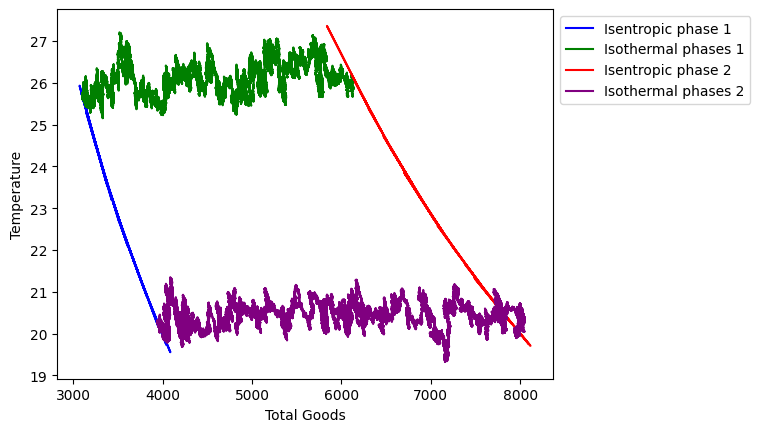

In [ ]:


G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gk,Mk,S)

import numpy as np
import matplotlib.pyplot as plt
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Isothermal phases 1', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## The multicycle

In [101]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((100, 100))

# Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

In [102]:
ga=[40]*100
ma=[40]*100
gb=[52]*100
mb=[52]*100
gc=[40]*100
mc=[40]*100
Tb=sum(mb)/200
Ta=sum(ma)/200

In [103]:
ga,gb,gc,ma,mb,mc,Gk,Mk,S,Gl1=inter_trade(ga,gb,gc,ma,mb,mc,Tb,Ta,6000,4000,1)

price 1.0
Time 0 Goodc 4000 5200 4000 Money 4000 5200 4000 1
Key 26.0 20.278173140825462 5.721826859174538
price 1.0279253841313734
Time 1 Goodc 3945.456246896968 5200 4000 Money 4055.634628165092 5200 4000 1
Key 26.0 20.408393655028306 5.591606344971694
price 1.0410808502050393
Time 2 Goodc 3920.616472968243 5200 4000 Money 4081.678731005661 5200 4000 1
Key 26.0 20.45632205624279 5.54367794375721
price 1.0459339682493736
Time 3 Goodc 3911.589579690475 5200 4000 Money 4091.264411248558 5200 4000 1
Key 26.0 20.850444572378613 5.149555427621387
price 1.086610218428073
Time 4 Goodc 3837.70449030777 5200 4000 Money 4170.088914475723 5200 4000 1
Key 26.0 21.044903027169426 4.9550969728305745
price 1.106864914012093
Time 5 Goodc 3802.614530600163 5200 4000 Money 4208.980605433885 5200 4000 1
Key 26.0 20.798959697539253 5.201040302460747
price 1.081537764102632
Time 6 Goodc 3846.182794143385 5200 4000 Money 4159.791939507851 5200 4000 1
Key 26.0 20.89253966672827 5.107460333271732
price 1.091

KeyboardInterrupt: 

In [ ]:
Tb=sum(mb)/200
Ta=sum(ma)/200
Tb

24.481357255968234

In [ ]:
ga,gb,gc,ma,mb,mc,Gk2,Mk2,S2,Gl2=inter_trade(ga,gb,gc,ma,mb,mc,Tb,Ta,5800,4200,1)

price 1.101884776098997
Time 0 Goodc 3950.5982266905667 5199.999999999997 3999.9999999999936 Money 4353.1040424740295 4896.2714511936465 4242.334997127765 1
Key 24.481357255968234 22.41126572900487 2.0700915269633633
price 1.1685653317285085
Time 1 Goodc 3835.6889632956622 5199.999999999997 3999.9999999999936 Money 4482.253145800974 4896.2714511936465 4242.334997127765 1
Key 24.481357255968234 22.569578979055517 1.9117782769127167
price 1.1850269771125015
Time 2 Goodc 3809.1249254172644 5199.999999999997 3999.9999999999936 Money 4513.915795811104 4896.2714511936465 4242.334997127765 1
Key 24.481357255968234 22.798486207965745 1.6828710480024895
price 1.2090681400354313
Time 3 Goodc 3771.249188204999 5199.999999999997 3999.9999999999936 Money 4559.697241593149 4896.2714511936465 4242.334997127765 1
Key 24.481357255968234 22.799386580829182 1.681970675139052
price 1.2091627060695982
Time 4 Goodc 3771.103171869886 5199.999999999997 3999.9999999999936 Money 4559.877316165836 4896.271451193

In [ ]:
Tb=sum(mb)/200
Ta=sum(ma)/200

In [ ]:
ga,gb,gc,ma,mb,mc,Gk3,Mk3,S3,Gl3=inter_trade(ga,gb,gc,ma,mb,mc,Tb,Ta,5600,4400,1)

price 1.0860433156847031
Time 0 Goodc 4139.7591780138655 5199.999999999995 3999.9999999999945 Money 4495.957783826359 4692.875686632789 4409.9183277604 1
Key 23.464378433163947 22.04475893937623 1.4196194937877173
price 1.045196068086707
Time 1 Goodc 4218.301161375484 5199.999999999995 3999.9999999999945 Money 4408.951787875246 4692.875686632789 4409.9183277604 1
Key 23.464378433163947 22.506534059793026 0.9578443733709214
price 1.0894636556131159
Time 2 Goodc 4131.672303859839 5199.999999999995 3999.9999999999945 Money 4501.306811958605 4692.875686632789 4409.9183277604 1
Key 23.464378433163947 23.23755293201756 0.22682550114638644
price 1.1618469449477984
Time 3 Goodc 4000.1056994751784 5199.999999999995 3999.9999999999945 Money 4647.510586403512 4692.875686632789 4409.9183277604 2
Key 23.464378433163947 23.26659150469329 0.1977869284706557
price 1.1505549497020786
Time 4 Goodc 4044.41204841505 5199.9999999999945 3999.9999999999945 Money 4653.3183009386585 4687.399104962633 4409.9183

#Plot

### Adjust start PArameter

<ipython-input-20-bc3d55752012>:21: UserWarning: The following kwargs were not used by contour: 'label'
  contour1 = plt.contour(G, M, lhs1 - rhs1, levels=[0], colors='r', label='ln(60000^2) - ln(G^2*M^2)')
<ipython-input-20-bc3d55752012>:22: UserWarning: The following kwargs were not used by contour: 'label'
  contour2 = plt.contour(G, M, lhs2 - rhs2, levels=[0], colors='b', label='ln(100000^2) - ln(G^2*M^2)')


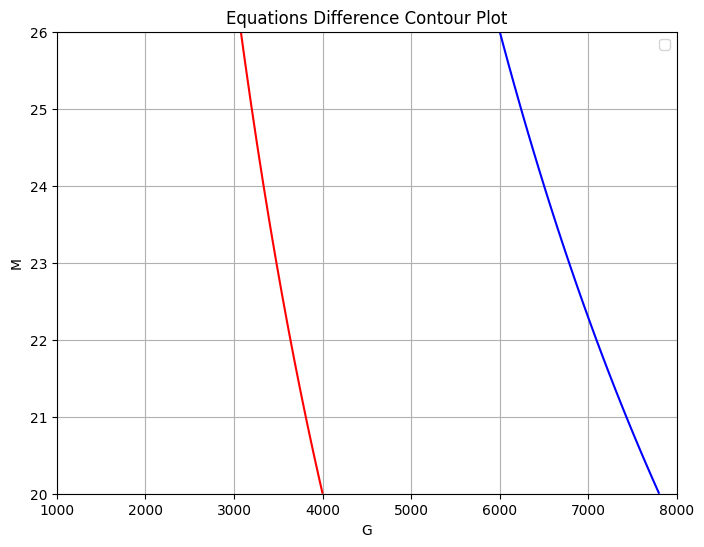

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for G and M
G_range = np.linspace(1000, 8000, 100)  # Adjust the number of points as needed for smoother curves
M_range = np.linspace(20, 26, 100)

# Create a grid of G and M values using numpy's meshgrid
G, M = np.meshgrid(G_range, M_range)

# Calculate the left-hand side values for the equations
lhs1 = np.log(4000**2*20**2)
lhs2 = np.log(6000**2*26**2)

# Calculate the right-hand side values for the equations
rhs1 = np.log(G**2 * M**2)
rhs2 = np.log(G**2 * M**2)  # Using the same form for both equations

# Create a contour plot for the difference between the left and right-hand sides of the equations
plt.figure(figsize=(8, 6))
contour1 = plt.contour(G, M, lhs1 - rhs1, levels=[0], colors='r', label='ln(60000^2) - ln(G^2*M^2)')
contour2 = plt.contour(G, M, lhs2 - rhs2, levels=[0], colors='b', label='ln(100000^2) - ln(G^2*M^2)')

plt.xlabel('G')
plt.ylabel('M')
plt.title('Equations Difference Contour Plot')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gk,Mk,S)

The first occurrence of 2 is at index 22000


In [ ]:
G1_1a,T1_1a,G1_2a,T1_2a,G1_3a,T1_3a,G1_4a,T1_4a=split_state(Gk2,Mk2,S2)

The first occurrence of 2 is at index 7000


In [ ]:
G1_1b,T1_1b,G1_2b,T1_2b,G1_3b,T1_3b,G1_4b,T1_4b=split_state(Gk3,Mk3,S3)

The first occurrence of 2 is at index 3000


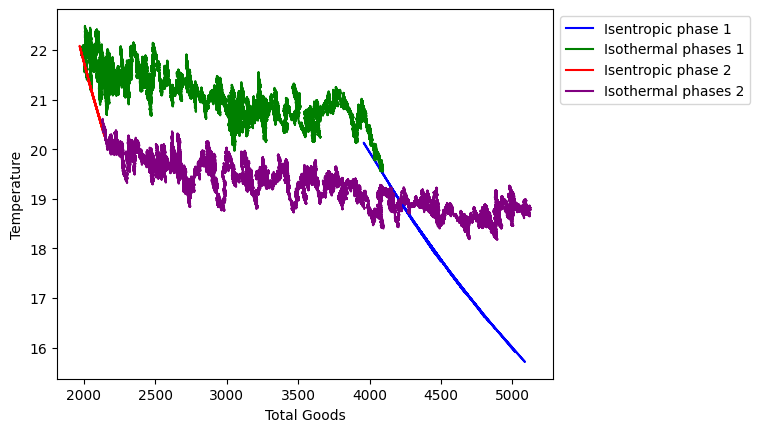

In [ ]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Isothermal phases 1', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

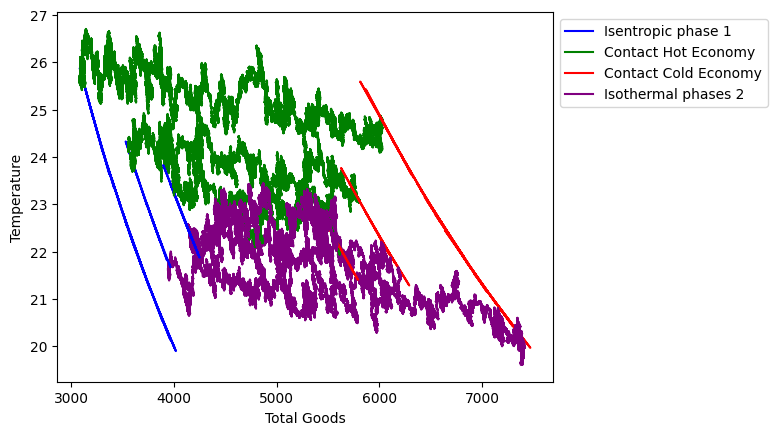

In [ ]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Contact Hot Economy', color='green')
plt.plot(G1_3, T1_3, label='Contact Cold Economy', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')

plt.plot(G1_1a, T1_1a,  color='blue')
plt.plot(G1_2a, T1_2a, color='green')
plt.plot(G1_3a, T1_3a, color='red')
plt.plot(G1_4a, T1_4a,  color='purple')


plt.plot(G1_1b, T1_1b,  color='blue')
plt.plot(G1_2b, T1_2b, color='green')
plt.plot(G1_3b, T1_3b, color='red')
plt.plot(G1_4b, T1_4b,  color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

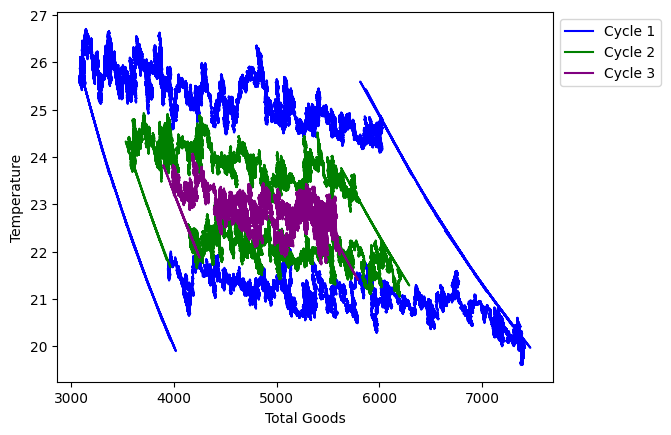

In [ ]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Cycle 1', color='blue')
plt.plot(G1_2, T1_2,  color='blue')
plt.plot(G1_3, T1_3,  color='blue')
plt.plot(G1_4, T1_4, color='blue')

plt.plot(G1_1a, T1_1a, label='Cycle 2', color='green')
plt.plot(G1_2a, T1_2a,  color='green')
plt.plot(G1_3a, T1_3a,  color='green')
plt.plot(G1_4a, T1_4a,  color='green')

plt.plot(G1_1b, T1_1b, label='Cycle 3', color='purple')
plt.plot(G1_2b, T1_2b,  color='purple')
plt.plot(G1_3b, T1_3b,  color='purple')
plt.plot(G1_4b, T1_4b,  color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

#Reverse

In [2]:
from os import statvfs_result
def inter_trade2(gooda,goodb,goodc,moneya,moneyb,moneyc,t1s,t2s,g11,g22,type):

  alphaa=2
  alphab=2
  alphac=2
  etaa=2
  etab=2
  etac=2
  num_agent=100

  state=1
  Gl=[]
  Ml=[]
  count=0
  S=[]
  gapa=0
  gapb=0
  c=0



  for j in range(1000):

    if state==4:
      count=count+1
    if count!=0 and state==1 and sum(moneyc):
      G_list=[gapa,gapb,c]
      return gooda,goodb,goodc,moneya,moneyb,moneyc,Gl,Ml,S,G_list
    if state==4 :
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)
    elif state==2:
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)
    elif state==3 or state==1:
      price=(sum(moneyc)*alphac)/(sum(goodc)*etac)



    print('price',price)
    print('Time' ,j,'Goodc',sum(goodc),sum(goodb),sum(gooda),'Money',sum(moneyc),sum(moneyb),sum(moneya),state)




    if state==1 :
      f=0

      miu=1.02*price
      for k in range(1000):




        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphaa,etaa)

        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.03)
        c=c+(sum(pmc)-sum(moneyc))
        moneyc=pmc.copy()
        goodc=pgc.copy()

        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))

        S.append(1)



    elif state==2 :


      miu=1.05*price


      gap_list=[]

      for k in range(10000):


        new_goodb,new_moneyb=agent_intra_trade(goodb,moneyb,matrix,alphab,etab)
        moneyb=new_moneyb.copy()
        goodb=new_goodb.copy()


        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        if k%10==0:
          # to control the speed of price trade, in case there is no enough time for the ship and economy be well mixed.
          pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.003)
          c=c+(sum(pmc)-sum(moneyc))


          moneyc=pmc.copy()
          goodc=pgc.copy()



        new_moneyb2,new_moneyc2=agent_inter_mtrade(goodb,goodc,moneyb,moneyc,matrix3,alphab,alphac,etab,etac,0.01,0.3)
        gapb=gapb+(sum(new_moneyc2)-sum(moneyc))
        if type==1:
          moneyb=new_moneyb2.copy()

        moneyc=new_moneyc2.copy()


        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))
        S.append(2)






    elif state==3:

      # I hope the fluctuation is smaller as to show the fluctuation on tangent direction we need to increase the ratio of real change

      miu=0.98*price

      for k in range(1000):

        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()


        pgc,pmc=moneyc,goodc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.03)
        c=c+(sum(pmc)-sum(moneyc))
        moneyc=pmc.copy()
        goodc=pgc.copy()


        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))



        S.append(3)



    elif state==4:

      gap_list=[]




      miu=0.95*price
      for k in range(10000):


        new_gooda,new_moneya=agent_intra_trade(gooda,moneya,matrix,alphaa,etaa)
        moneya=new_moneya.copy()
        gooda=new_gooda.copy()

        new_goodc,new_moneyc=agent_intra_trade(goodc,moneyc,matrix3,alphac,etac)
        moneyc=new_moneyc.copy()
        goodc=new_goodc.copy()

        if k%10==0:
          pgc,pmc=agent_inter_tradep(goodc,moneyc,matrix3,alphac,etac,miu,0.003)
          c=c+(sum(pmc)-sum(moneyc))
          moneyc=pmc.copy()
          goodc=pgc.copy()



        new_moneya2,new_moneyc2=agent_inter_mtrade(gooda,goodc,moneya,moneyc,matrix3,alphaa,alphac,etaa,etac,0.01,0.3)
        gapa=gapa+(sum(new_moneyc2)-sum(moneyc))
        if type==1:
          moneya=new_moneya2.copy()

        moneyc=new_moneyc2.copy()


        Gl.append(sum(goodc))
        Ml.append(sum(moneyc))
        S.append(4)


    prev_state=state
    temp_state=check_state3(goodc, moneyc, t1s,t2s, state,g11,g22)
    state=temp_state




  return gooda,goodb,goodc,moneya,moneyb,moneyc,Gl,Ml,S

In [ ]:
ga=[40]*100
ma=[40]*100
gb=[40]*160
mb=[40]*160
gc=[50]*160
mc=[32]*160
Tb=sum(mb)/200
Ta=sum(ma)/200

In [ ]:
ga,gb,gc,ma,mb,mc,Gk,Mk,S,G1=inter_trade2(ga,gb,gc,ma,mb,mc,Tb,Ta,2000,5000,1)

###One cycle

In [76]:
def check_state3(list1, list2, t1s,t2s,state,e11, e22):
    sum_g = sum(list1)
    sum_m = sum(list2)
    T = (sum_m)/200
    print('Key',t1s,T,abs(t1s-T))

    new_state = state

    if state == 1:
        if  abs(T-t1s)>0.5 :
            new_state = 1
        else:
            new_state = 2
    elif state == 2:
        if  abs(((sum_g*sum_m)/10000)-e11)<40 :
            new_state = 3
        else:
          new_state=2
    elif state == 3:
        if abs(T- t2s)<0.5:
            new_state = 4
        else:
          new_state=3

    elif state == 4:
        if  abs(((sum_g*sum_m)/10000)-e22)<40:
            new_state = 1
        else:
          new_state=4

    return new_state

The first occurrence of 2 is at index 1000


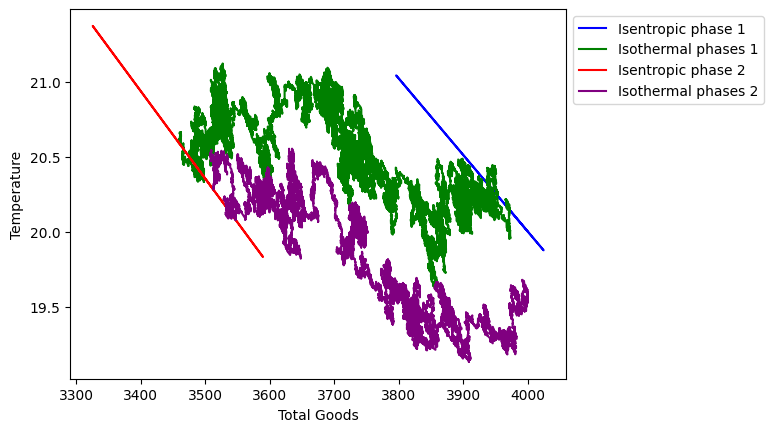

In [114]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gk,Mk,S)
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Isothermal phases 1', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

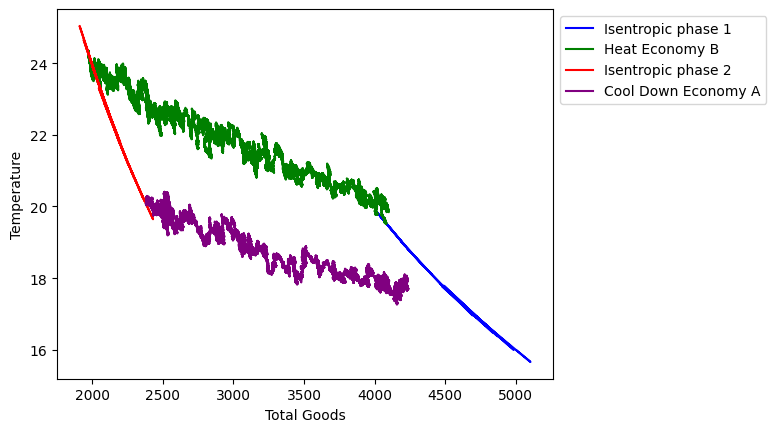

In [ ]:

# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Heat Economy B', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Cool Down Economy A', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Multi Cycle Reverse

In [110]:
ga=[40]*100
ma=[40]*100
gb=[40]*100
mb=[40]*100
gc=[40]*100
mc=[40]*100
Tb=sum(mb)/200
Ta=sum(ma)/200

In [111]:
Tb=sum(mb)/200
Ta=sum(ma)/200


In [112]:
ga,gb,gc,ma,mb,mc,Gk,Mk,S,G1=inter_trade2(ga,gb,gc,ma,mb,mc,Tb,Ta,1400,1600,1)

price 1.0
Time 0 Goodc 4000 4000 4000 Money 4000 4000 4000 1
Key 20.0 20.170229604131567 0.17022960413156696
price 1.0169979092009855
Time 1 Goodc 3966.621646248714 4000 4000 Money 4034.0459208263137 4000 4000 2
Key 20.0 20.230577570894432 0.23057757089443243
price 1.0327558249879056
Time 2 Goodc 3917.785226944878 4000.000000000001 4000 Money 4046.1155141788868 4012.0602617217223 4000 2
Key 20.0 20.017847063219502 0.017847063219502246
price 1.0252204373637441
Time 3 Goodc 3905.081548060722 4000.0 4000 Money 4003.5694126439007 4029.0076708951547 4000 2
Key 20.0 19.72326601456205 0.27673398543795
price 1.024114452070647
Time 4 Goodc 3851.7698826891406 4000.0000000000005 4000 Money 3944.65320291241 4064.004229289772 4000 2
Key 20.0 20.15430335803661 0.15430335803661066
price 1.0626461816675026
Time 5 Goodc 3793.2293374282885 3999.999999999999 4000 Money 4030.860671607322 4057.0059426279417 4000 2
Key 20.0 20.333852731602285 0.3338527316022848
price 1.0785241217358195
Time 6 Goodc 3770.681

In [115]:
Tb=sum(mb)/200
Ta=sum(ma)/200
print(Ta,Tb,G1)
#19.463800683456874 20.751235480981773 [356.3938123957764, -499.32118302586423, 583.542106896653, -493.19811821430994]


19.463800683456874 20.751235480981773 [356.3938123957764, -499.32118302586423, 583.542106896653, -493.19811821430994]


In [116]:
ga,gb,gc,ma,mb,mc,Gk2,Mk2,S2,G2=inter_trade2(ga,gb,gc,ma,mb,mc,Tb,Ta,1200,1600,1)

price 0.9811227918830079
Time 0 Goodc 3995.229561825483 4000.000000000003 3999.999999999998 Money 3919.810781911744 4150.2470961963545 3892.760136691375 1
Key 20.751235480981773 20.05715510762472 0.6940803733570533
price 1.0276030663326485
Time 1 Goodc 3903.6775511395676 4000.000000000003 3999.999999999998 Money 4011.431021524944 4150.2470961963545 3892.760136691375 1
Key 20.751235480981773 20.57009145296148 0.18114402802029161
price 1.0809854932379888
Time 2 Goodc 3805.8034231977967 4000.000000000003 3999.999999999998 Money 4114.018290592297 4150.2470961963545 3892.760136691375 2
Key 20.751235480981773 20.648152444270508 0.10308303671126495
price 1.0881763010012249
Time 3 Goodc 3795.001310958943 4000.0000000000027 3999.999999999998 Money 4129.630488854102 4149.238643246322 3892.760136691375 2
Key 20.751235480981773 21.428271258132565 0.6770357771507918
price 1.1594406935092383
Time 4 Goodc 3696.311743773003 4000.0000000000027 3999.999999999998 Money 4285.654251626513 4136.220830148161

In [118]:
Tb=sum(mb)/200
Ta=sum(ma)/200
print(Ta,Tb,G2)
#18.18312877541932 22.43692753791368 [851.2199282089987, -1120.4233205076953, 1489.8494291914076, -1143.3582859025887]

18.18312877541932 22.43692753791368 [851.2199282089987, -1120.4233205076953, 1489.8494291914076, -1143.3582859025887]


In [119]:
ga,gb,gc,ma,mb,mc,Gk3,Mk3,S3,G3=inter_trade2(ga,gb,gc,ma,mb,mc,Tb,Ta,1000,1600,1)

price 0.830424030743798
Time 0 Goodc 4337.6166790046245 4000.0000000000014 4000.0000000000027 Money 3602.0611264005474 4487.385507582736 3636.625755083864 1
Key 22.43692753791368 18.45530388042614 3.981623657487539
price 0.8720666438382245
Time 1 Goodc 4232.544384268354 4000.0000000000014 4000.0000000000027 Money 3691.060776085228 4487.385507582736 3636.625755083864 1
Key 22.43692753791368 18.759086064104796 3.6778414738088827
price 0.9009606420041779
Time 2 Goodc 4164.240964483287 4000.0000000000014 4000.0000000000027 Money 3751.8172128209594 4487.385507582736 3636.625755083864 1
Key 22.43692753791368 18.968081552468735 3.4688459854449434
price 0.9210586013340414
Time 3 Goodc 4118.756727312632 4000.0000000000014 4000.0000000000027 Money 3793.616310493747 4487.385507582736 3636.625755083864 1
Key 22.43692753791368 19.19061016021501 3.24631737769867
price 0.942706960208482
Time 4 Goodc 4071.3839974133552 4000.0000000000014 4000.0000000000027 Money 3838.122032043002 4487.385507582736 363

In [120]:
print(Ta,Tb,G2)
#18.18312877541932 22.43692753791368 [851.2199282089987, -1120.4233205076953, 1489.8494291914076, -1143.3582859025887]

18.18312877541932 22.43692753791368 [851.2199282089987, -1120.4233205076953, 1489.8494291914076, -1143.3582859025887]


In [121]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gk,Mk,S)
G1_1a,T1_1a,G1_2a,T1_2a,G1_3a,T1_3a,G1_4a,T1_4a=split_state(Gk2,Mk2,S2)
G1_1b,T1_1b,G1_2b,T1_2b,G1_3b,T1_3b,G1_4b,T1_4b=split_state(Gk3,Mk3,S3)



The first occurrence of 2 is at index 1000
The first occurrence of 2 is at index 2000
The first occurrence of 2 is at index 19000


In [ ]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Heat Economy A', color='green')
plt.plot(G1_3, T1_3, label='Cool Down Economy B', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')

plt.plot(G1_1a, T1_1a,  color='blue')
plt.plot(G1_2a, T1_2a, color='green')
plt.plot(G1_3a, T1_3a, color='red')
plt.plot(G1_4a, T1_4a,  color='purple')


plt.plot(G1_1b, T1_1b,  color='blue')
plt.plot(G1_2b, T1_2b, color='green')
plt.plot(G1_3b, T1_3b, color='red')
plt.plot(G1_4b, T1_4b,  color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

NameError: name 'plt' is not defined

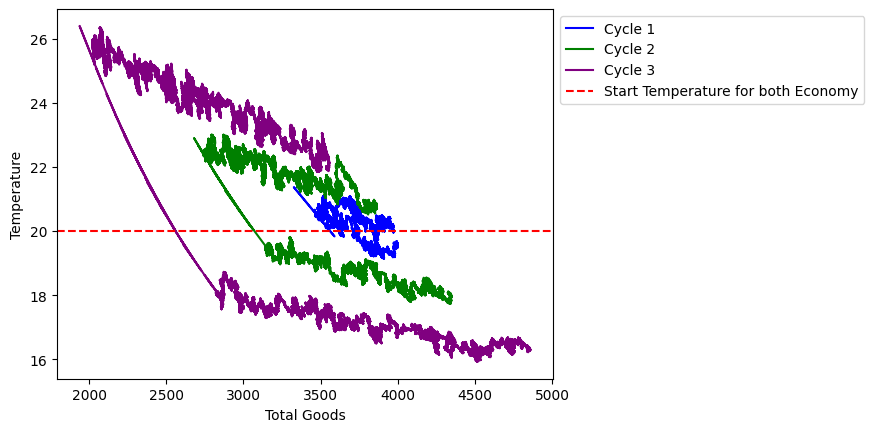

In [123]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
# plt.plot(G1_1, T1_1, label='Cycle 1', color='blue')
plt.plot(G1_2, T1_2,label='Cycle 1',  color='blue')
plt.plot(G1_3, T1_3,  color='blue')
plt.plot(G1_4, T1_4, color='blue')

# plt.plot(G1_1a, T1_1a, label='Cycle 2', color='green')
plt.plot(G1_2a, T1_2a, label='Cycle 2', color='green')
plt.plot(G1_3a, T1_3a,  color='green')
plt.plot(G1_4a, T1_4a,  color='green')

# plt.plot(G1_1b, T1_1b, label='Cycle 3', color='purple')
plt.plot(G1_2b, T1_2b, label='Cycle 3', color='purple')
plt.plot(G1_3b, T1_3b,  color='purple')
plt.plot(G1_4b, T1_4b,  color='purple')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.axhline(y=20, color='red', linestyle='--', label='Start Temperature for both Economy')

# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
